In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

In [3]:
df = pd.read_csv(path)
df.head(3)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa

In [4]:
#df = df[['Petal.Length', 'Sepal.Length', 'Species']]

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Length'>

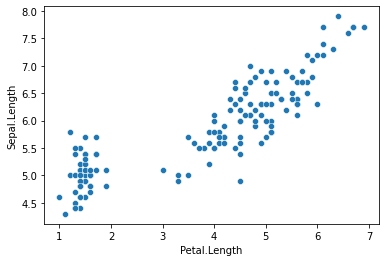

In [5]:
sns.scatterplot(data=df, x='Petal.Length', y='Sepal.Length')

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
X_std = StandardScaler().fit_transform(df.iloc[:, :-1])


In [8]:
df_std = pd.DataFrame(data=X_std, columns=df.columns[:-1])
df_std['Species'] = df['Species']

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_std)

KMeans(n_clusters=3)

In [10]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [11]:
kmeans.fit_predict(X_std)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [12]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [13]:
# Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
inertia = kmeans.inertia_
inertia

139.82049635974974

In [14]:
kmeans.n_iter_

5

In [15]:
df.head(1)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa

In [16]:
cluster_centers

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

<AxesSubplot:title={'center':'kmeans classification'}, xlabel='Petal.Length', ylabel='Sepal.Length'>

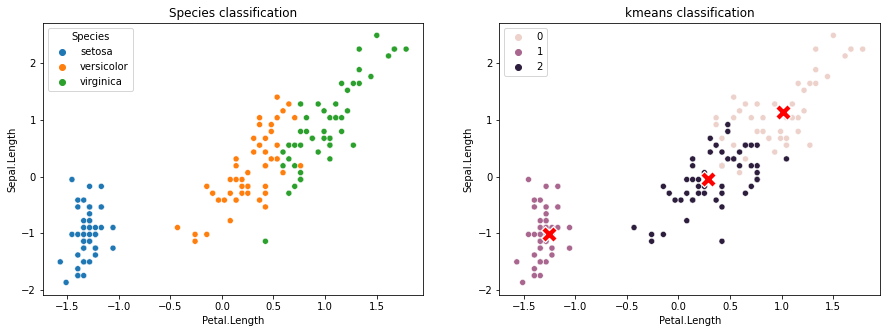

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', hue='Species', ax=axes[0]).set_title("Species classification")
sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', hue=labels, ax=axes[1]).set_title("kmeans classification")
sns.scatterplot(x=cluster_centers[:, 3], y=cluster_centers[:, 0], marker="X", s=250, color='r', ax=axes[1])

In [33]:
inertia = []
siluette_coef = []

for no_kmeans in range(2, 15):
    kmeans = KMeans(n_clusters=no_kmeans)
    kmeans.fit(X_std)
    inertia.append(kmeans.inertia_)
    sil_coeff = silhouette_score(X_std, kmeans.labels_, metric='euclidean')
    siluette_coef.append(sil_coeff)

Text(0, 0.5, 'Valor de coeficiente de silueta')

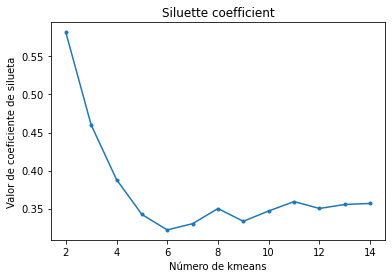

In [34]:
plt.plot(range(2, 15), siluette_coef, '.-')

plt.title('Siluette coefficient')
plt.xlabel('Número de kmeans')
plt.ylabel('Valor de coeficiente de silueta')

Text(0, 0.5, 'Valor de inertia')

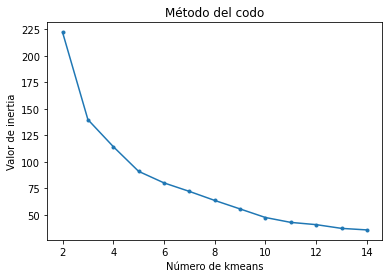

In [35]:
plt.plot(range(2, 15), inertia, '.-')

plt.title('Método del codo')
plt.xlabel('Número de kmeans')
plt.ylabel('Valor de inertia')

In [19]:
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


3
6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


9
12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


15


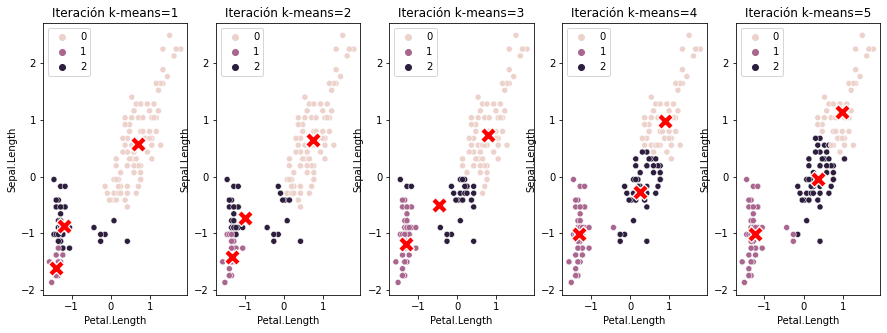

In [20]:
init = np.array([[2, 0], [2, 0], [2, 0]])
frames = 5
fig, axes = plt.subplots(1, frames, figsize=(15, 5))

for idx in range(1, frames+1):
    
    kmeans = KMeans(n_clusters=3, max_iter=3*idx, init=init)
    kmeans.fit(X_std)
    labels = kmeans.labels_
    print(kmeans.n_iter_)
    cluster_centers = kmeans.cluster_centers_

    sns.scatterplot(data=df_std, x='Petal.Length', y='Sepal.Length', hue=labels, ax=axes[idx-1]).set_title(f"Iteración k-means={idx}")
    sns.scatterplot(x=cluster_centers[:, 0], y=cluster_centers[:, 1], marker="X", s=250, color='r', ax=axes[idx-1])
